# Belt Exam: Option A

## Instructions

### Part 1

* Download and unzip the zip file provided to you [here](https://drive.google.com/file/d/1sHYd7BCQ_HhOoTkQ7lmFNwNQfec3TMr3/view?usp=sharing).
    * Unzip the files into your private repository.
* Load the provided joblib file. Display the .keys of the dictionary stored in the joblib file.
* Assign each of the keys from the dictionary as a separate variable.
* Use the preprocessor to transform the X_train/X_test data into processed dataframes. 
* Replace the column names with the correct feature names extracted from the preprocessor. 

**Explain the Linear Regression Model:**

* Extract the coefficients and save them as a Series with the correct feature names as the index.
* Change the Pandas option for float format to display the coefficients with pandas in a readable form:
    * comma separator for thousands
    * and 2 decimal places.
* Create a bar graph of the coefficients, sorted from largest to smallest. 

* Provide a quantitative interpretation (both magnitude and directionality) of the three largest positive coefficients explaining how that feature impacts the target.
* Provide a quantitative interpretation (both magnitude and directionality)  of the three largest negative coefficients explaining how that feature impacts the target.

**Explain the Random Forest Model:**

* Extract and create a bar graph of the feature importances, sorted from largest to smallest. 
* What are the top 6 most important features? 
* Of the top 6 most important features, identify which of these features also appeared in the 3 largest or 3 smallest coefficients. 

**Apply Shap to Explain the Random Forest Model**

* Sample 500 rows of the processed X_train data as X_shap, using random_state=321
* Save the corresponding y_train values as y_shap
* Create a shap model explainer for the random forest model
* Calculate the shap values for the sampled data
* Create a summary plot (plot_type =’dot’) of the most important features, according to shap.
* Interpret the top 6 most important features. According to shap, what effect does each feature have on the model’s prediction?

### Part 2

* Load the provided csv, located in the zip file you downloaded in Part 1.
* Prepare the data as a time series DataFrame:
    * Melt the wide-form data into a long-form time series.
        * The date column should be named “Date”
        * The value column should be named “Home Value”
    * Convert the Date column to Datetime data type.
    * Set the Date column as the index
* Filter the data:
    * Keep data from the following states:  CA, WA, OR, AZ, NV
    * Keep values from the years  2010 - 2020.
* Save the processed data as a  .csv file in a “Data” folder inside your private repo, name the csv “Data/data-for-tableau.csv”
* Resample the home values, grouped by states, to a yearly frequency (based on the beginning of the calendar year) using the mean as the aggregation function.
* Plot a line graph with each of the states as a separate line.

### Part 3

* Create a new tableau workbook and load in the “data-for-tableau.csv” from part 2.
* Rename Region Name to “Zip Code,” ensure its data type is geographic role > zip code, and convert it to a dimension. 
* Create a hierarchy called “Location” using the following:
    * State
    * County Name
    * City
    * Zip Code
* Create a set of the top 20 zip codes according to median home value, called “Most Expensive Zip Codes”
* Create a Tableau story with the following:
    * Story Point 1) A bar graph of Median Home Value by Location (Specifically: State, County Name, and Zip Code, excluding City) for the Most Expensive Zipcodes
        * Filter the visualization to only show the Most Expensive Zipcodes.
        * Color the bars by County Name
    * Story Point 2) A line graph of the change in home values by Year (2010, 2011, etc.), colored by State.
        * For each state, calculate the % difference in the median Home Value relative to the first date.
        * Use annotation to answer the question: which state had the largest % increase in home value between 2010 and 2020? 
    * Story Point 3) A highlight table of the Most Expensive zip codes.
        * Include the following columns:
            * State 
            * County Name
            * City 
            * Zip Code
            * Median Home Value
        * Only include the top 20 zip codes
        * Filter the table by Month/Year and select December 2020 as the default.
            * Show the filter on the visualization as a single value slider.

* Story Point 4) Create a choropleth map of the median home value by zip code.
    * Filter by Month & Year, with a default value of 12/2020
        * Show the filter on your visualization as a single value slider.
    * Color your visualization by median home value.
    * Add County and City to the tooltip.
    * Change the Style of the background map layer to Dark.
* Make sure to include all 4 views in your story with an appropriate caption for each story point before saving your workbook.

* Save the workbook to Tableau Public with your Story as the current view.
    * Use the following settings on your online workbook:
        * Show Viz on Profile: OFF
        * Show Sheets: ON
        * Allow Access: OFF
    * Your setting should match the screenshot below:

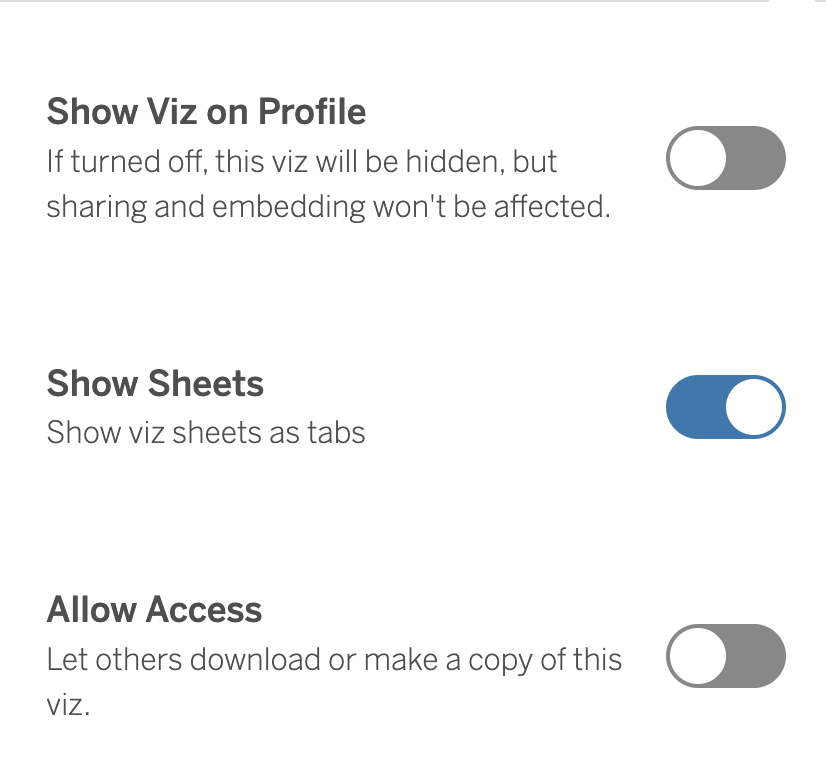

* Create a share link and insert the share link into a markdown cell at the bottom of your notebook in a new section with the header: “# Tableau Workbook”

### Final Deliverables: 

* All of your files should be saved in a PRIVATE * github repository.
    * Make sure your name has the following format: "First-Last__Belt-Exam-A" (Please make sure you use two underscores after your name).
* Make sure your Jupyter notebook has all 3 sections, including your tableau workbook link.
* Ensure that your data is also included in your repo (joblib and csvs). 
* Download your final repository as a zip file on github.com (not from Github Desktop).
* Submit the single zipped file.
* Email a backup submission to your instructor.

### Notes:

* To prevent other students from copying your work, please make sure code is saved on a PRIVATE GitHub.
* To minimize score deduction, please make sure your notebook fulfills all of the requirements above before uploading. 
* If you are having trouble uploading files on the Exam App, please DO NOT unlock another exam. Please email the file to your instructor.
* You may use any resources you have available (class notes, Google, Stackoverflow, etc.) - BUT YOU MUST CITE ANY SOURCES USED. You must cite sources in the form of a code comment or a text cell where you use any borrowed code with links to any resources you used. Failure to cite sources will be considered plagiarism and result in failing the exam.
* You may NOT get or receive help from any other person with your code. This includes classmates, alumni, your instructor, etc. Collaboration with another person on this exam will be considered plagiarism and can result in dismissal from the program.

## Solution

**Data Dictionary**

* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* LandContour: Flatness of the property
    * Lvl Near Flat/Level
    * Bnk Banked - Quick and significant rise from street grade to building
    * HLS Hillside - Significant slope from side to side
    * Low Depression
* OverallCond: Overall condition rating
    * 10 Very Excellent
    * 9 Excellent
    * 8 Very Good*
    * 7 Good
    * 6 Above Average
    * 5 Average
    * 4 Below Average
    * 3 Fair
    * 2 Poor
    * 1 Very Poor
* TotalBsmtSF: Total square feet of basement area
* CentralAir: Central air conditioning
    * N No
    * Y Yes
* GrLivArea: Above grade (ground) living area square feet
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

### Part 1

In [1]:
## import libraries
import joblib
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#### Loading Model and Data from Joblib


In [2]:
jl_model = joblib.load('data/saved_model.joblib')
jl_model.keys()

dict_keys(['preprocessor', 'X_train', 'X_test', 'y_train', 'y_test', 'LinearRegression', 'RandomForestRegressor'])

In [3]:
## recovering model and data
# Preprocessor
preprocessor = jl_model['preprocessor']

# Training and Testing Data
X_train = jl_model['X_train']
X_test = jl_model['X_test']
y_train = jl_model['y_train']
y_test = jl_model['y_test']

# Models
lr_model = jl_model['LinearRegression']
rf_model = jl_model['RandomForestRegressor']

In [4]:
display(X_train.head(), y_train.head())

,Lot Area,Lot Frontage,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,TotRms AbvGrd,Land Contour
853,16269,NaN,5,907.0,Y,907,5,Lvl
1055,13891,107.0,5,1710.0,Y,1710,6,Lvl
2483,8900,NaN,4,1056.0,Y,1056,5,Lvl
2351,11475,85.0,6,713.0,Y,1552,6,Lvl
1700,13654,118.0,5,1704.0,Y,2758,9,Lvl


853     140000
1055    372402
2483    107000
2351    179900
1700    418000
Name: SalePrice, dtype: int64

Data has been loaded correctly.

As we see, the data contains missing values, then for the purpose of this assignment I'll assume that the preprocessor has already addressed this thing by imputing missing values.

#### Transforming the data using the preprocessor

In [5]:
feature_names = preprocessor.get_feature_names_out()
X_train_transformed = pd.DataFrame(preprocessor.transform(X_train),
                          columns=feature_names, index=X_train.index)
X_train_transformed.head()

,Lot Area,Lot Frontage,Overall Cond,Total Bsmt SF,Gr Liv Area,TotRms AbvGrd,Central Air_Y,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl
853,16269.0,69.230685,5.0,907.0,907.0,5.0,1.0,0.0,0.0,0.0,1.0
1055,13891.0,107.000000,5.0,1710.0,1710.0,6.0,1.0,0.0,0.0,0.0,1.0
2483,8900.0,69.230685,4.0,1056.0,1056.0,5.0,1.0,0.0,0.0,0.0,1.0
2351,11475.0,85.000000,6.0,713.0,1552.0,6.0,1.0,0.0,0.0,0.0,1.0
1700,13654.0,118.000000,5.0,1704.0,2758.0,9.0,1.0,0.0,0.0,0.0,1.0


In [6]:
X_test_transformed = pd.DataFrame(preprocessor.transform(X_test),
                         columns=feature_names, index=X_test.index)
X_test_transformed.head()

,Lot Area,Lot Frontage,Overall Cond,Total Bsmt SF,Gr Liv Area,TotRms AbvGrd,Central Air_Y,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl
343,13860.0,75.000000,7.0,1952.0,2704.0,9.0,1.0,0.0,0.0,0.0,1.0
1413,8405.0,50.000000,8.0,861.0,1367.0,7.0,1.0,0.0,0.0,0.0,1.0
2583,11310.0,75.000000,5.0,1367.0,1375.0,5.0,1.0,0.0,0.0,0.0,1.0
2020,6180.0,60.000000,5.0,960.0,986.0,5.0,0.0,0.0,0.0,0.0,1.0
348,8530.0,69.230685,5.0,384.0,1474.0,7.0,1.0,0.0,0.0,0.0,1.0


We see that the data has been transformed correctly, but it is not scaled. As it is not the purpose of the assignment to do this task, I'll continue with the data as it is.

### Linear Regression

#### Display Coefficients

In [7]:
## Setting decimals to 2
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

In [8]:
## Extracting Coefficients using .coef_ attribute
coefficients = pd.Series(lr_model.coef_, index=feature_names)

In [9]:
## Saving Intercept in a variable
intercept = lr_model.intercept_
coefficients.loc['Intercept'] = intercept

In [10]:
intercept

0.0

Interesting, the intercept is equal to zero.

In [11]:
## Displaying Coefficients
coefficients.sort_values(ascending=False)

Central Air_Y       31,927.22
Land Contour_HLS     4,243.63
Overall Cond         1,737.31
Lot Frontage           109.31
Gr Liv Area            101.28
Total Bsmt SF           59.75
Lot Area                 0.11
Intercept                0.00
TotRms AbvGrd       -6,299.91
Land Contour_Lvl   -42,264.19
Land Contour_Low   -43,310.96
Land Contour_Bnk   -72,620.47
dtype: float64

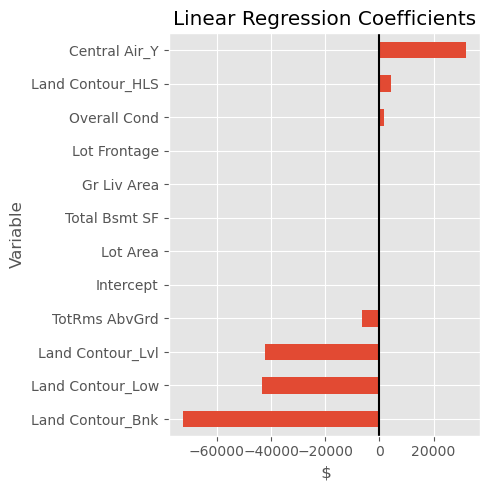

In [12]:
## Plotting Coefficients
ax = coefficients.sort_values(ascending=False).plot(kind='barh', figsize=(5, 5))
ax.axvline(0, color='k')
plt.gca().invert_yaxis() ## taken from https://stackoverflow.com/questions/34076177/matplotlib-horizontal-bar-chart-barh-is-upside-down
ax.set_title('Linear Regression Coefficients')
ax.set_xlabel(' $')
ax.set_ylabel('Variable')
plt.tight_layout()
plt.savefig('img/lr_coefficientes.png', dpi=300)

#### Interpreting Coefficients

**Top 3 Positive Coefficients**

* Central Air_Y: Having central air conditioning can add to the price 31,927.22 dollars.
* Land Contour_HLS: Having Significant slope from side to side can add 4,243.63 dollars to the price.
* Overall Cond: Higher the overall condition can add 1,737.31 dollars to the price.

**Top 3 Negative Coefficients**

* Land Contour_Lvl: Having Near Flat/Level can subtract -42,264.19 dollars to the price.
* Land Contour_Low: Having Low Depression can subtract -43,310.96 dollars to the price.
* Land Contour_Bnk: HAving Quick and significant rise from street grade to building can substract -72,620.47 to the price.

### Random Forest Regressor

Extracting the importance from the model.

In [13]:
## getting importances from the model
importances = pd.Series(rf_model.feature_importances_, index=feature_names)
importances.sort_values(ascending=False)

Gr Liv Area        0.44
Total Bsmt SF      0.36
Lot Area           0.06
Lot Frontage       0.05
Overall Cond       0.03
TotRms AbvGrd      0.03
Central Air_Y      0.01
Land Contour_HLS   0.01
Land Contour_Bnk   0.01
Land Contour_Lvl   0.00
Land Contour_Low   0.00
dtype: float64

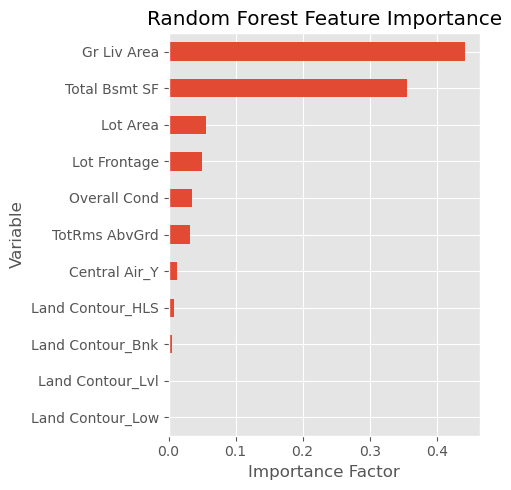

In [14]:
## Plotting importance
ax = importances.sort_values(ascending=False).plot(kind='barh', figsize=(5, 5))
plt.gca().invert_yaxis()
ax.set_title('Random Forest Feature Importance')
ax.set_xlabel('Importance Factor')
ax.set_ylabel('Variable')
plt.tight_layout()
plt.savefig('img/rf_feature_importance.png', dpi=300)

#### Interpreting Feature Importance

First of all, we can see that the most important feature is the GrLivArea, which is the above grade (ground) living area square feet. This is not surprising, as the bigger the house, the more expensive tend to be. Nonetheless we can see other features that have higher factor:

The 2 most important features are:
* Gr Liv Area: 0.44
* Total Bsmt SF:    0.36

The 4 following most important features are:
* Lot Area:         0.06
* Lot Frontage:     0.05
* Overall Cond:     0.03
* TotRms AbvGrd:    0.03

If we compare this features with the coefficients of the linear regression we can see different results here.

In linear regression the coefficient that push the price up is the Central Air_Y, but in the random forest regressor the most important feature is the GrLivArea, that have no important effect in linear regressionm model. The second most important feature is Total Bsmt SF, but in the linear regression the most important feature is Land Contour_HLS, which is not in the top 6 of the random forest regressor, and so on. This is because the random forest regressor is a non-linear model, and the linear regression is obviously a linear model. As it is not the purpose of this assignment to compare both models because, but the features analysis that we extract from the random forest regressor seems more reasonable about what you can see when you are buying a house.

By the way, the only feature that is in both most important features is Overall Cond.

#### Doing feature importance using SHAP

In [15]:
import shap
shap.initjs()

In [16]:
%%time
## creating shap values
# Subsetting the data
X_shap = shap.sample(X_train_transformed, nsamples=500, random_state=321)
y_shap = y_train.loc[X_shap.index]
## instantiating the explainer
explainer = shap.Explainer(rf_model)
shap_vals = explainer(X_shap, y_shap)

CPU times: total: 5 s
Wall time: 15.6 s


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


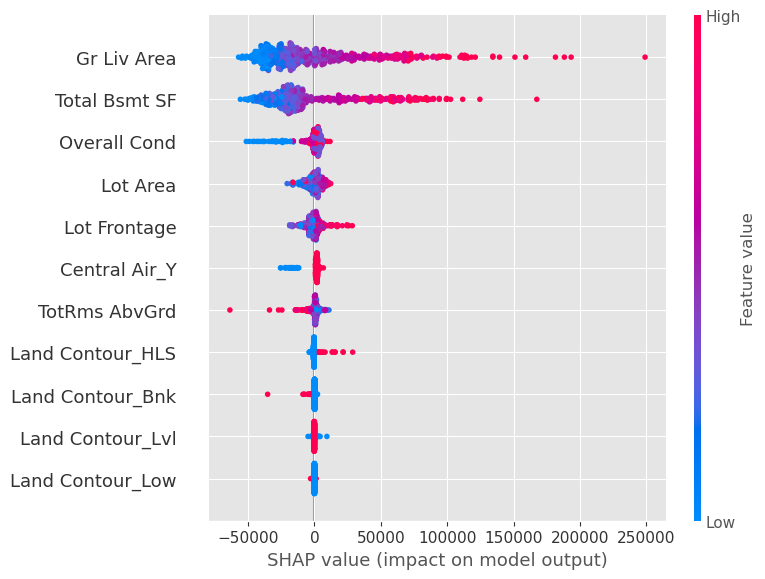

In [17]:
shap.summary_plot(shap_vals, plot_type ='dot', show=False)
plt.savefig("img/SHAP_feature_importance.png",dpi=300, bbox_inches='tight')

The top 6 most important features according to SHAP are:

* Gr Liv Area: this is the feature that have the most predictive power in the model. We can say that the greater the living area, the more expensive the house, and that's reasonable.

* Total Bsmt SF: We can say that the greater the basement area, the more expensive the house.

* Overall Cond: The red dots are concentrated around the 0 SHAP value, but we see a blue tail in the left side of the plot. This means that lower the overall conditions of the house have a negative impact in the price.

* Lot Area: We have a similar case that the Overall Cond,then we can conclude that the smaller the lot area, the lower the price.

* Lot Frontage: Red dots are in the right side of the plot, so the grater the lot frontage, the higher the price.

* Central Air_Y: Red dots are above the 0 SHAP Value, then we can say that having central air conditioning can add to the price.

### Part 2

#### Time Series

In [18]:
## Load files

data = pd.read_csv('data/zillow_home_values-zipcode.csv')
data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,31012000,...,28022022,31032022,30042022,31052022,30062022,31072022,31082022,30092022,31102022,30112022
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"107,261.00",...,"261,945.00","267,644.00","273,946.00","280,066.00","285,121.00","288,532.00","290,458.00","291,103.00","292,081.00","292,948.00"
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,"222,569.00",...,"453,150.00","464,727.00","478,369.00","489,712.00","497,173.00","499,429.00","497,572.00","498,113.00","500,187.00","503,109.00"
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,"90,009.00",...,"177,319.00","179,463.00","182,812.00","186,403.00","189,836.00","192,064.00","193,760.00","195,140.00","196,787.00","198,137.00"
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"188,096.00",...,"570,211.00","572,145.00","573,662.00","576,469.00","578,706.00","580,834.00","581,779.00","584,566.00","588,188.00","590,722.00"
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"275,983.00",...,"752,025.00","757,734.00","760,336.00","766,163.00","771,443.00","776,607.00","779,281.00","782,367.00","788,211.00","793,924.00"


In [19]:
## saving columns to a list
id_columns = data.columns[:9]
id_columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName'],
      dtype='object')

In [20]:
## Melting data
data_melted = pd.melt(data,
                      id_vars=id_columns,
                      var_name='Date',
                      value_name='Home Value')
data_melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,Home Value
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,31012000,"107,261.00"
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,31012000,"222,569.00"
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,31012000,"90,009.00"
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,31012000,"188,096.00"
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,31012000,"275,983.00"


In [21]:
## setting date as datetime and index
data_melted['Date'] = pd.to_datetime(data_melted['Date'], format='%d%m%Y')
data_melted.set_index('Date', inplace=True)
data_melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Home Value
Date,,,,,,,,,,
2000-01-31,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,"107,261.00"
2000-01-31,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,"222,569.00"
2000-01-31,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,"90,009.00"
2000-01-31,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"188,096.00"
2000-01-31,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,"275,983.00"


data is melted correctly, and set the data as index.

#### Filtering data to keep:
* States:  CA, WA, OR, AZ, NV
* Years  2010 - 2020.

In [22]:
## filtering states
states = ['CA', 'WA', 'OR', 'AZ', 'NV']
data_filtered = data_melted[data_melted['State'].isin(states)]

## filtering years
data_filtered = data_filtered.loc['2010':'2020']
display(data_filtered.head(), data_filtered.tail())

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Home Value
Date,,,,,,,,,,
2010-01-31,95992,5,90011,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"209,250.00"
2010-01-31,96361,8,91331,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"257,372.00"
2010-01-31,96193,9,90650,zip,CA,CA,Norwalk,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"296,430.00"
2010-01-31,96083,12,90201,zip,CA,CA,Bell,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,"271,829.00"
2010-01-31,96816,13,92335,zip,CA,CA,Fontana,"Riverside-San Bernardino-Ontario, CA",San Bernardino County,"156,704.00"


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Home Value
Date,,,,,,,,,,
2020-12-31,98502,30657,95950,zip,CA,CA,Grimes,NaN,Colusa County,"220,881.00"
2020-12-31,95776,30657,89041,zip,NV,NV,Pahrump,"Pahrump, NV",Nye County,NaN
2020-12-31,99923,30657,98623,zip,WA,WA,White Salmon,NaN,Klickitat County,"538,209.00"
2020-12-31,99927,30657,98628,zip,WA,WA,Goldendale,NaN,Klickitat County,"112,436.00"
2020-12-31,99841,30657,98522,zip,WA,WA,Chehalis,"Centralia, WA",Lewis County,NaN


In [23]:
data_filtered['State'].unique()

array(['CA', 'WA', 'AZ', 'NV', 'OR'], dtype=object)

Data is correctly filtered.

#### Saving data to csv for further analysis

In [24]:
data_filtered.to_csv('data/data-for-tableau.csv')

#### Plotting data

In [25]:
## Resample the data to yearly frequency at the beginning of the calendar year

# B         business day frequency
# C         custom business day frequency (experimental)
# D         calendar day frequency
# W         weekly frequency
# M         month end frequency
# SM        semi-month end frequency (15th and end of month)
# BM        business month end frequency
# CBM       custom business month end frequency
# MS        month start frequency
# SMS       semi-month start frequency (1st and 15th)
# BMS       business month start frequency
# CBMS      custom business month start frequency
# Q         quarter end frequency
# BQ        business quarter endfrequency
# QS        quarter start frequency
# BQS       business quarter start frequency
# A         year end frequency
# BA, BY    business year end frequency
# AS, YS    year start frequency          #### <--- this is the one we are using
# BAS, BYS  business year start frequency
# BH        business hour frequency
# H         hourly frequency
# T, min    minutely frequency
# S         secondly frequency
# L, ms     milliseconds
# U, us     microseconds
# N         nanoseconds

In [26]:
ts = data_filtered.groupby('State')['Home Value'].resample('AS').mean()
ts

State  Date      
AZ     2010-01-01   169,930.89
       2011-01-01   152,272.47
       2012-01-01   159,902.06
       2013-01-01   183,657.23
       2014-01-01   198,551.49
       2015-01-01   206,834.17
       2016-01-01   217,452.80
       2017-01-01   229,066.03
       2018-01-01   244,689.17
       2019-01-01   257,396.58
       2020-01-01   278,841.94
CA     2010-01-01   415,491.81
       2011-01-01   388,468.03
       2012-01-01   388,593.63
       2013-01-01   454,509.85
       2014-01-01   505,808.42
       2015-01-01   535,297.12
       2016-01-01   569,319.27
       2017-01-01   601,938.43
       2018-01-01   646,936.55
       2019-01-01   649,531.48
       2020-01-01   675,124.17
NV     2010-01-01   189,285.32
       2011-01-01   168,931.54
       2012-01-01   165,003.29
       2013-01-01   199,847.53
       2014-01-01   228,975.14
       2015-01-01   247,372.12
       2016-01-01   265,123.98
       2017-01-01   284,543.22
       2018-01-01   319,753.46
       2019-01-01   3

In [27]:
from matplotlib.ticker import FuncFormatter

## defining functions tu use in the plot
def format_k(value, tick_number):
    if value >= 1000:
        return f'{int(value / 1_000)}K'
    else:
        return f'{float(value) / 1_000:.2f}K'

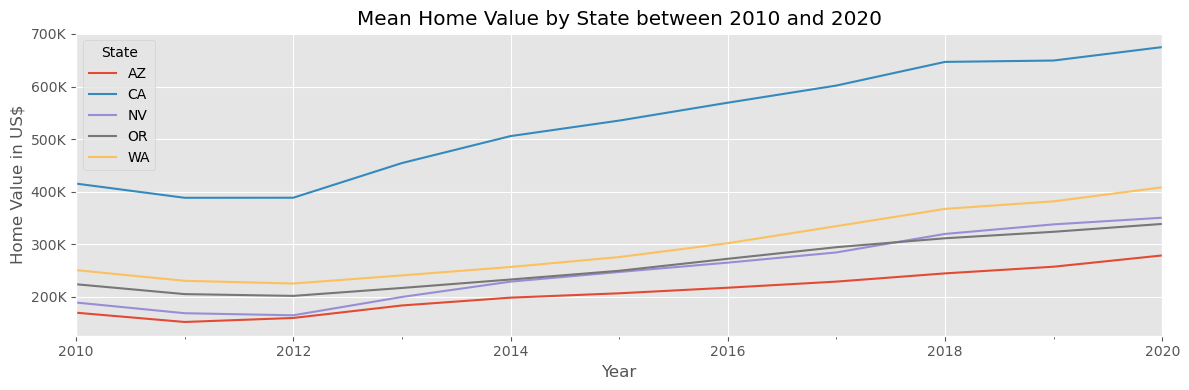

In [28]:
## ploting mean prices by state
ax = ts.unstack(level=0).plot(figsize=(12, 4))
ax.set_title('Mean Home Value by State between 2010 and 2020')
ax.set_ylabel('Home Value in US$')
ax.set_xlabel('Year')
ax.yaxis.set_major_formatter(FuncFormatter(format_k))
plt.tight_layout()
plt.savefig('img/mean_home_value_by_state_10-20.png', dpi=300)

We can see that the overall trend in Home Value is increasing, but we can see that the states of California and Washington are the ones that have the highest prices, and Arizona is the one that has the lowest prices.

### Part 3

Tableau Visualization can be found by clicking the link below:

[Visualizations: Home Prices](https://public.tableau.com/app/profile/israel.diaz/viz/shared/XPQ85743M)